In [1]:
import pylab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.spatial.distance import cdist
from scipy.cluster import hierarchy 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

In [2]:
df = pd.read_csv("customers.csv")

df["Annual Income (k$)"] = df["Annual Income (k$)"] * 1000

df = df.drop(columns=["CustomerID"])

columns = {"Gender": "Gender", "Age": "Age", "Annual Income (k$)": "Income", "Spending Score (1-100)": "Score"}

df = df.rename(columns=columns)

df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 0})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  200 non-null    int64
 1   Age     200 non-null    int64
 2   Income  200 non-null    int64
 3   Score   200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Score'}>]], dtype=object)

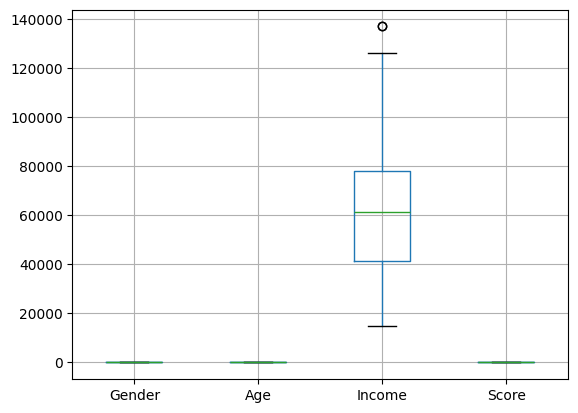

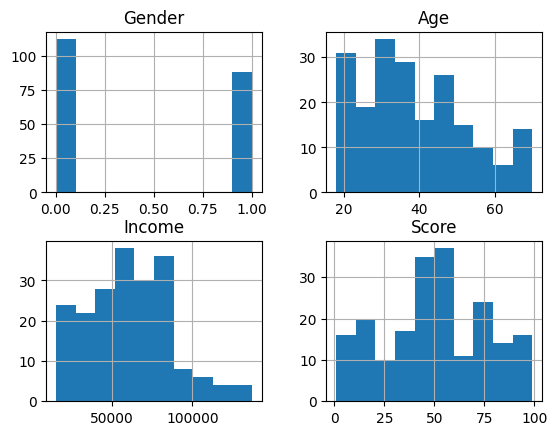

In [3]:
df.boxplot()
df.hist()

In [4]:
scaler = StandardScaler()
x = df.values
x = scaler.fit_transform(x)
x

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [5]:
dist_matrix = euclidean_distances(x,x)
print(dist_matrix)

[[0.         1.63681098 2.38878538 ... 4.54611614 4.81867651 5.02250496]
 [1.63681098 0.         3.54154808 ... 4.3182849  5.31878915 4.70189264]
 [2.38878538 3.54154808 0.         ... 5.42195122 5.13299938 5.90251765]
 ...
 [4.54611614 4.3182849  5.42195122 ... 0.         2.21418015 0.5647686 ]
 [4.81867651 5.31878915 5.13299938 ... 2.21418015 0.         2.5274803 ]
 [5.02250496 4.70189264 5.90251765 ... 0.5647686  2.5274803  0.        ]]


In [6]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\pc\AppData\Local\Temp\ipykernel_19584\1633147189.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


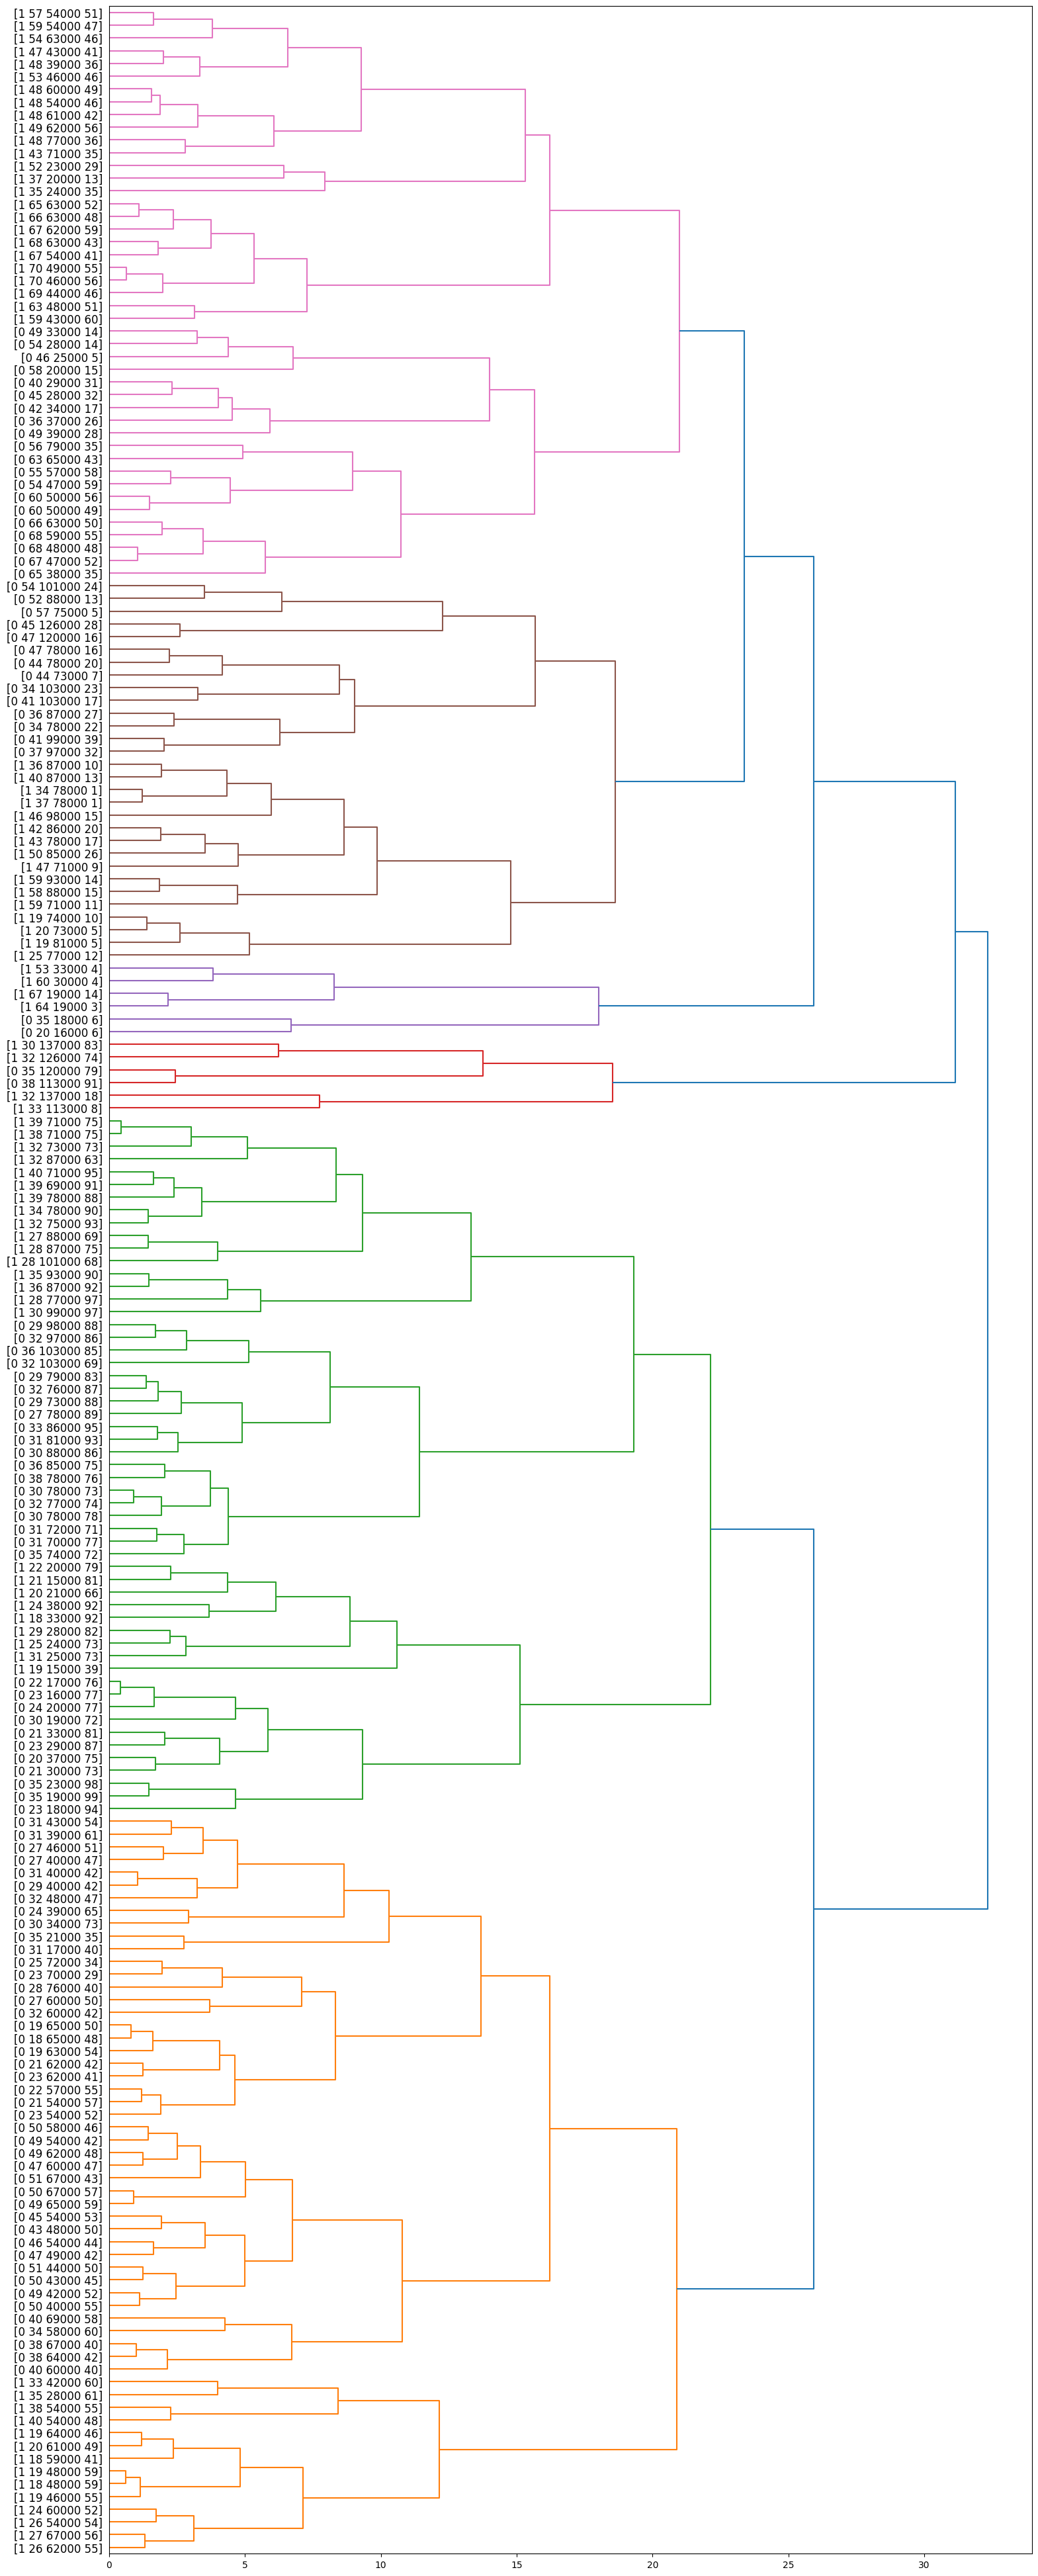

In [7]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s %s]' % (int(float(df['Gender'][id])), df['Age'][id], df['Income'][id], df['Score'][id])
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [8]:
model = AgglomerativeClustering(n_clusters=4, linkage='average')
model.fit(x)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [9]:
clusters = model.labels_
clusters

array([2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2,
       0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 3, 2, 3, 2, 3, 2,
       0, 0, 3, 0, 0, 2, 3, 0, 0, 2, 0, 0, 3, 2, 3, 0, 0, 2, 3, 2, 0, 0,
       0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 2, 3, 2, 3, 2, 0, 0,
       3, 2, 3, 2, 0, 0, 3, 0, 0, 2, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2,
       3, 2], dtype=int64)

In [10]:
df['CustomerType'] = model.labels_
print(df["CustomerType"].value_counts())
df.head()

CustomerType
0    112
2     41
1     27
3     20
Name: count, dtype: int64


,Gender,Age,Income,Score,CustomerType
0,1,19,15000,39,2
1,1,21,15000,81,2
2,0,20,16000,6,0
3,0,23,16000,77,0
4,0,31,17000,40,0


C:\Users\pc\AppData\Local\Temp\ipykernel_19584\1247665277.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Age, subset.Income, s= subset.Score*10, c=color, label='CustomerType'+str(label),alpha=0.5)
C:\Users\pc\AppData\Local\Temp\ipykernel_19584\1247665277.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Age, subset.Income, s= subset.Score*10, c=color, label='CustomerType'+str(la

Text(0, 0.5, 'Income')

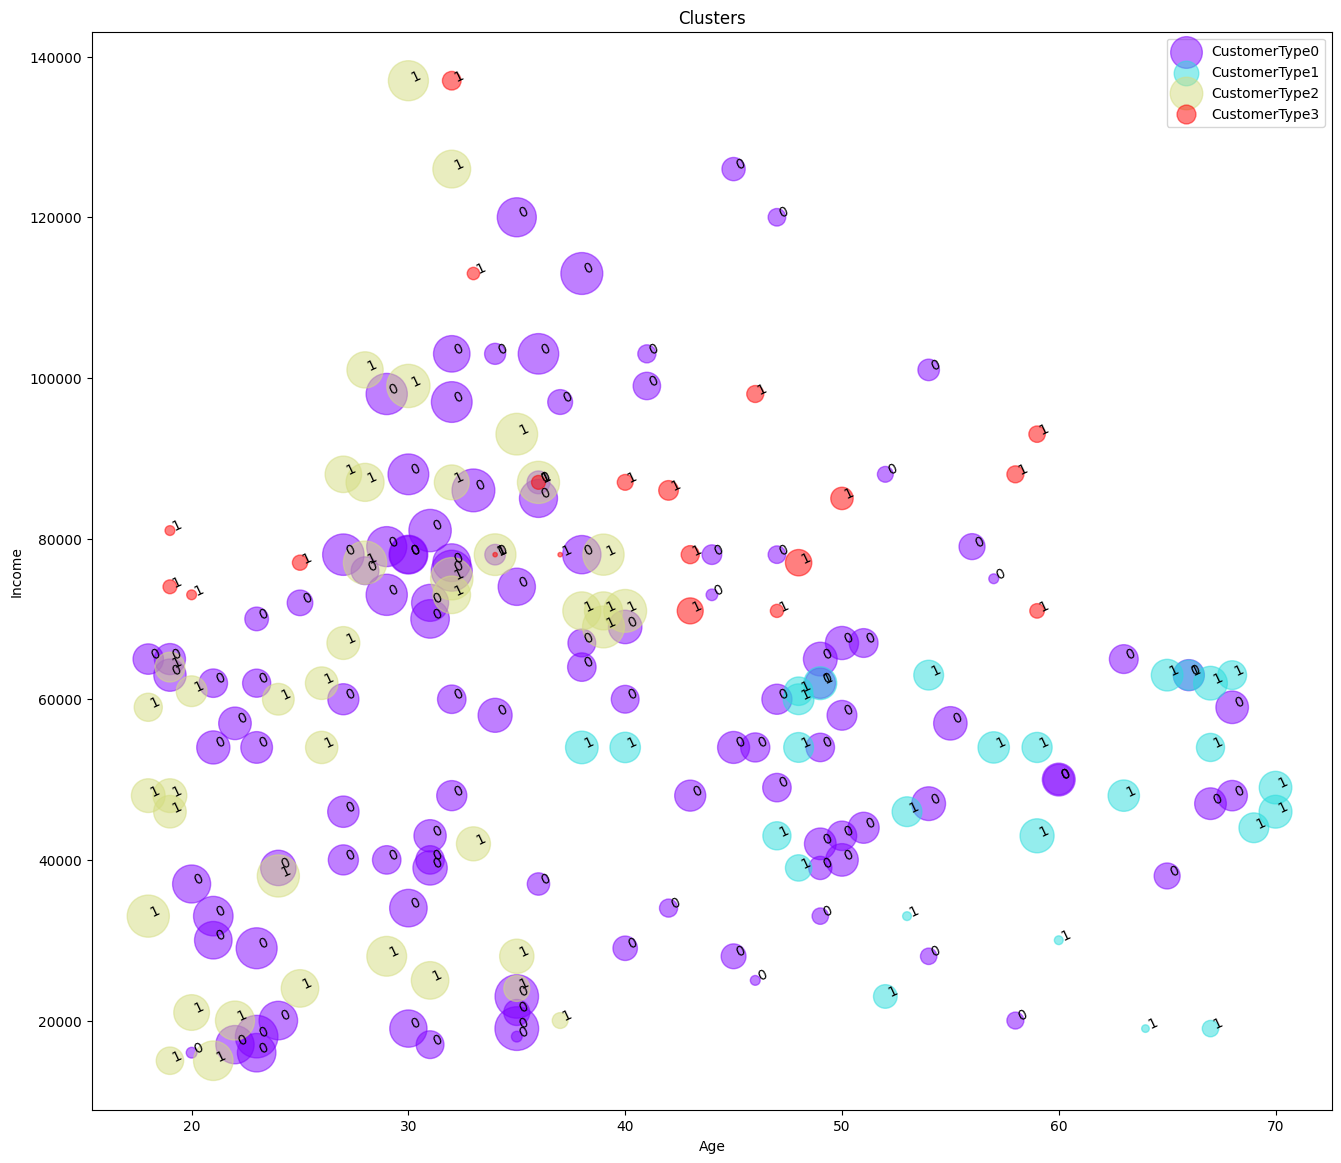

In [11]:
n_clusters = max(model.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.CustomerType == label]
    for i in subset.index:
            plt.text(subset.Age[i], subset.Income[i],str(subset['Gender'][i]), rotation=25) 
    plt.scatter(subset.Age, subset.Income, s= subset.Score*10, c=color, label='CustomerType'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Income')